<a href="https://colab.research.google.com/github/kangel429/DeepLearning/blob/master/lesson4_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.collab import *           #필터링을 위해서
from fastai.tabular import *          # 테이블 형식 데이터를 처리하기 위해서

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title'    # 카테고리 

In [0]:
path = untar_data(URLs.ML_SAMPLE)           # URLs.ML_SAMPLE 다운받기 
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [0]:
ratings = pd.read_csv(path/'ratings.csv')   # 판도스를 이용한 csv 읽기
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42) #필터링문제를 위한 데이터 번치  등급, 랜덤시드=42

In [0]:
y_range = [0,5.5]           #최소 0,  최대ㅐ 5.5점수

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range) #필터링을 위한 모델.  필터링 범위는 (0~5,5)

In [0]:
learn.fit_one_cycle(3, 5e-3)    #학습

epoch,train_loss,valid_loss,time
0,1.606275,0.909234,00:01
1,0.855977,0.672934,00:00
2,0.656418,0.666534,00:00


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [0]:
path=Config.data_path()/'ml-100k'       




In [0]:
!cp -r /content/drive/'My Drive'/ml-100k /root/.fastai/data   #ml-100다운 받은거 경로 복사해서 이동시켜줌


In [0]:
!ls /root/.fastai/data/ml-100k    #경로 확인

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [0]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,   #판도스를 통한 csv 데이터 읽기 user,item,'rating','timestamp']카테고리로 구분
                      names=[user,item,'rating','timestamp'])
ratings.head()  

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,  #판도스를 통한 csv 데이터 읽기 item, 'title', 'date', 'N', 'url카테고리로 구분
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
len(ratings)      #개수 100000

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]]) #rating_movie 에 있던 csv와 movies에 있는 케타고리를 합칩
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title) #필터링문제를 위한 데이터 번치  등급, 랜덤시드=42 유요한 데이터 1%

In [0]:
data.show_batch()     #item_name=title target = rating

userId,title,target
572,White Squall (1996),1.0
497,Army of Darkness (1993),3.0
434,Sense and Sensibility (1995),3.0
125,Emma (1996),5.0
452,Independence Day (ID4) (1996),5.0


In [0]:
y_range = [0,5.5]  #최소 0,  최대ㅐ 5.5점수

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)  #필터링을 위한 모델.  필터링 범위는 (0~5.5)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


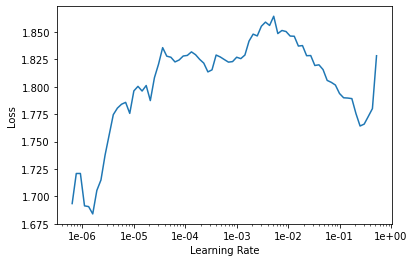

In [0]:
learn.lr_find()                     #적합한 학습속도 찾기
learn.recorder.plot(skip_end=15)    #그래프로 보여줌

In [0]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.936417,0.944400,00:10
1,0.889439,0.884449,00:10
2,0.776280,0.838367,00:10
3,0.640082,0.818522,00:10
4,0.568663,0.817086,00:10


In [0]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [0]:
learn.load('dotprod');

In [0]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [0]:
g = rating_movie.groupby(title)['rating'].count()  #제목별로 묶어 결과를 얻기 위해 사용함  ----- 제목에 해당되는 개수 확인
top_movies = g.sort_values(ascending=False).index.values[:1000]   #상위~1000까지 가지고 옴 ascending =False 내림차순
top_movies[:10]   #~10개까지만 보여줌

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)  #top_movies의 바이어스를 얻기
movie_bias.shape      #1000개 배열로 되어있음

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()   # 영화의 대한 카테고리를 모아서 평균 등급을 구함
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)] #상위권 영화의 편견과 제목 등급이 무엇인지 분류

In [0]:
item0 = lambda o:o[0]

In [0]:
sorted(movie_ratings, key=item0)[:15]     # 낮은 편견, 영화,등급 ~15리스트 //낮은편견일수록 매니아층? 호불호?

[(tensor(-0.3364),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3219),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2672), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2658), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2627), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2545), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2485), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2387), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2344), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2310), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2243), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2240), 'Halloween: The Curse of Michael Myers (1995)', 2.2),
 (tensor(-0.2115), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2113), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.2103), "McHale's N

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]  #movie_ratings을 o:o형태로 보여줌 ~15리스트  높은편견, 영화,등급  reverse=True 뒤집어서

[(tensor(0.5936), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5781), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5760), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5587), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5236), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5164), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5132), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5037), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.5003), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4992), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4824), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4817), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4706), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4542), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4476), 'Vertigo (1958)', 4.251396648044692)]

### Movie weights

In [0]:
movie_w = learn.weight(top_movies, is_item=True)  #weight 설정
movie_w.shape

torch.Size([1000, 40])

In [0]:
movie_pca = movie_w.pca(3)      #고차원 데이터를 저차원의 데이터로 바꿔줌
movie_pca.shape                   # [1000, 3])

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()      #영화 유형을3개 분류
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)] #영화 장르 유형별로 나눠서 보여줌

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2669), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.2408), 'Home Alone 3 (1997)'),
 (tensor(1.1958), "McHale's Navy (1997)"),
 (tensor(1.1729), 'Jungle2Jungle (1997)'),
 (tensor(1.1665), 'Leave It to Beaver (1997)'),
 (tensor(1.1367), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1345), 'Bio-Dome (1996)'),
 (tensor(1.1257), 'Congo (1995)'),
 (tensor(1.0911), 'Batman & Robin (1997)'),
 (tensor(1.0335), 'Free Willy 3: The Rescue (1997)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0874), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0716), 'Lawrence of Arabia (1962)'),
 (tensor(-1.0466), 'Close Shave, A (1995)'),
 (tensor(-1.0168), 'Godfather, The (1972)'),
 (tensor(-1.0159), 'When We Were Kings (1996)'),
 (tensor(-0.9907), 'Casablanca (1942)'),
 (tensor(-0.9792), 'Chinatown (1974)'),
 (tensor(-0.9519), 'Godfather: Part II, The (1974)'),
 (tensor(-0.9443), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9439), 'Ran (1985)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]  #영화 장르 유형별로 나눠서 보여줌

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1271), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.1229), 'Braveheart (1995)'),
 (tensor(1.0343), 'Titanic (1997)'),
 (tensor(0.8818), "It's a Wonderful Life (1946)"),
 (tensor(0.8786), 'Independence Day (ID4) (1996)'),
 (tensor(0.8663), "Mr. Holland's Opus (1995)"),
 (tensor(0.8402), 'Forrest Gump (1994)'),
 (tensor(0.8373), 'Pretty Woman (1990)'),
 (tensor(0.8276), 'American President, The (1995)'),
 (tensor(0.8199), 'Star Wars (1977)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.9759), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.8730), 'Keys to Tulsa (1997)'),
 (tensor(-0.7831), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7768), 'Dead Man (1995)'),
 (tensor(-0.7751), 'Trainspotting (1996)'),
 (tensor(-0.7661), 'Stupids, The (1996)'),
 (tensor(-0.7498), 'Road to Wellville, The (1994)'),
 (tensor(-0.7448), 'Brazil (1985)'),
 (tensor(-0.7304), 'Crumb (1994)'),
 (tensor(-0.7151), 'Jude (1996)')]

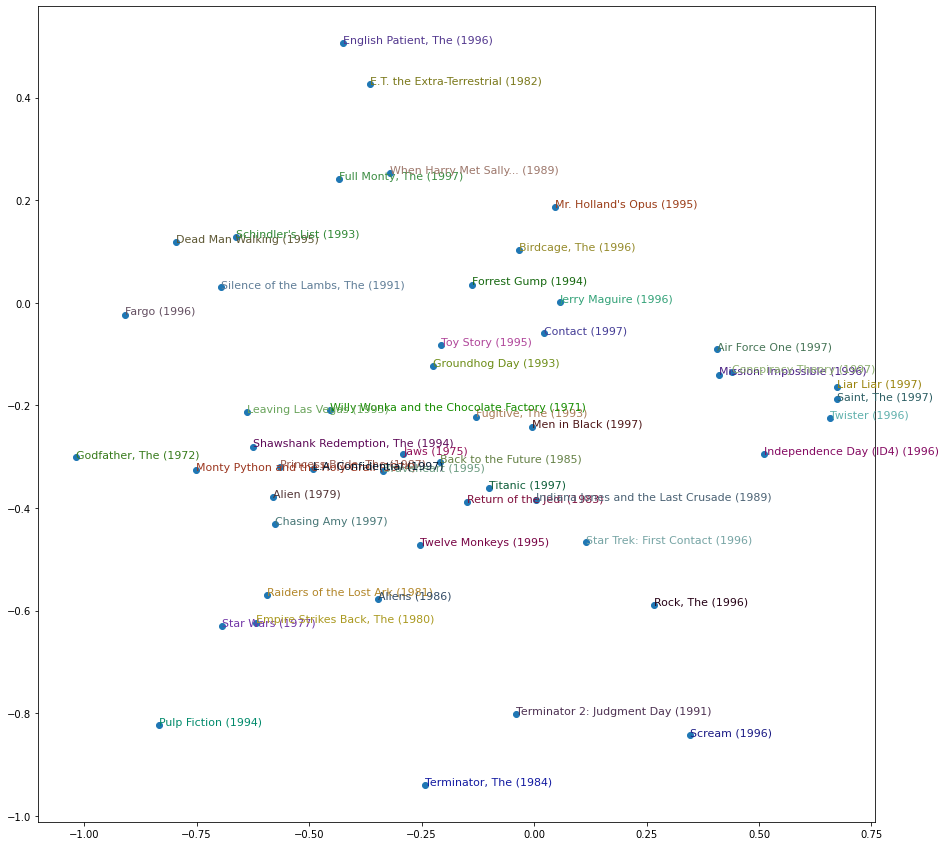

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False) #상위영화 랜덤하게 선택
idxs = list(range(50))     #50편의 영화
X = fac0[idxs]              #fac0 장르
Y = fac2[idxs]              #fac1 장르
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()